# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Mengatur agar output matplotlib muncul inline di notebook
%matplotlib inline

# Mengabaikan peringatan
import warnings
warnings.filterwarnings('ignore')

# Mengatur style untuk plot seaborn agar lebih menarik
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [15]:
# Load Dataset
df = pd.read_csv('../telco-dataset_raw/telco_dataset.csv')

# Melihat Seluruh Kolom Dataset
pd.options.display.max_columns = 100
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### EDA Awal dan Pembersihan

In [16]:
# Tampilkan informasi umum dataset (tipe data, nilai non-null)
print("\nInformasi dataset (df.info()):")
df.info()

# Tampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif (df.describe()):")
df.describe()


Informasi dataset (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
# Cek jumlah nilai unik untuk setiap kolom
print("\nJumlah nilai unik per kolom (df.nunique()):")
print(df.nunique())


Jumlah nilai unik per kolom (df.nunique()):
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [18]:
# Cek apakah ada customerID yang duplikat
print(f"\nJumlah customerID unik: {df['customerID'].nunique()}")
print(f"Total baris: {len(df)}")
if df['customerID'].nunique() != len(df):
    print("Peringatan: Ada customerID yang duplikat!")
else:
    print("Setiap customerID unik.")


Jumlah customerID unik: 7043
Total baris: 7043
Setiap customerID unik.


In [19]:
# --- Cek Missing Values ---
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("\nKolom 'customerID' telah dihapus.")

if 'TotalCharges' in df.columns:
    df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.loc[(df['tenure'] == 0) & (df['TotalCharges'].isnull()), 'TotalCharges'] = 0.0
    if df['TotalCharges'].isnull().sum() > 0:
        median_total_charges = df['TotalCharges'].median()
        df['TotalCharges'].fillna(median_total_charges, inplace=True)
        print(f"'TotalCharges' NaN values imputed.")

if 'SeniorCitizen' in df.columns and df['SeniorCitizen'].dtype != 'object':
    df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
    print("\nKolom 'SeniorCitizen' diubah ke 'No'/'Yes'.")

print("\nFinal missing values count:")
print(df.isnull().sum())


Kolom 'customerID' telah dihapus.

Kolom 'SeniorCitizen' diubah ke 'No'/'Yes'.

Final missing values count:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [20]:
# --- Identifikasi Kolom ---
target_col = 'Churn'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"\nColumn Identification:")
print(f"Target: {target_col}")
print(f"Numerical Features: {numerical_cols}")
print(f"Categorical Features: {categorical_cols}")


Column Identification:
Target: Churn
Numerical Features: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Visualisasi EDA

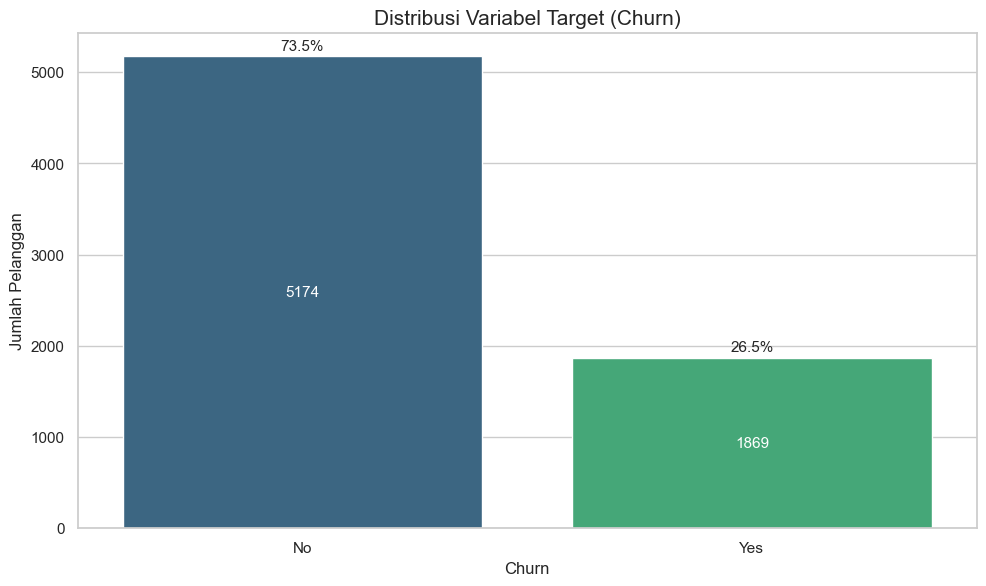

In [21]:
# Distribusi Variabel Target (Churn)
plt.figure(figsize=(10, 6))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Churn)', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
total_samples = len(df[target_col])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_samples)
    count = int(p.get_height())
    x_pos = p.get_x() + p.get_width() / 2
    plt.gca().annotate(percentage, (x_pos, p.get_height() + total_samples * 0.005), ha='center', va='bottom', fontsize=11)
    plt.gca().annotate(f'{count}', (x_pos, p.get_height() * 0.5), ha='center', va='center', color='white', fontsize=11)
plt.tight_layout(pad=1.0)
plt.show()

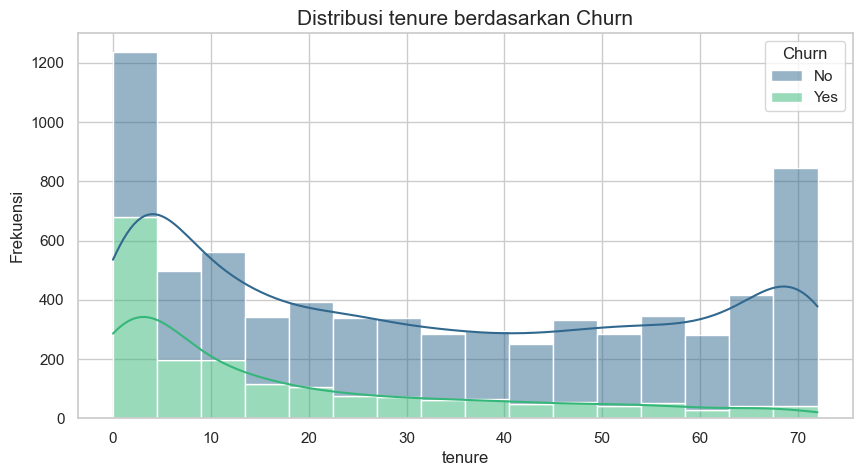

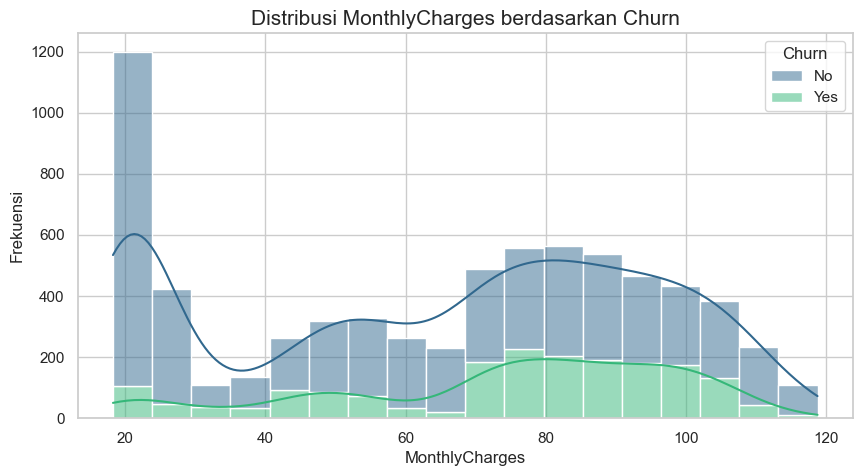

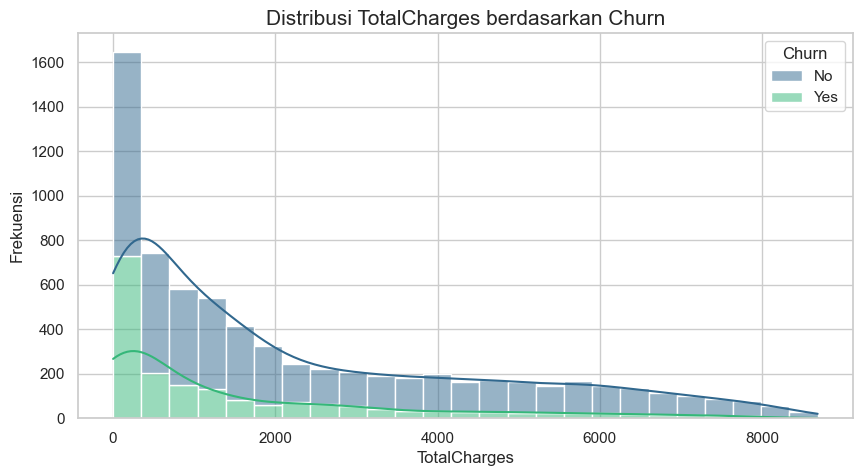

In [22]:
# Distribusi Fitur Numerik terhadap Churn
for col_num in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col_num, hue=target_col, kde=True, palette='viridis', multiple="stack")
    plt.title(f'Distribusi {col_num} berdasarkan Churn', fontsize=15)
    plt.xlabel(col_num, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.show()

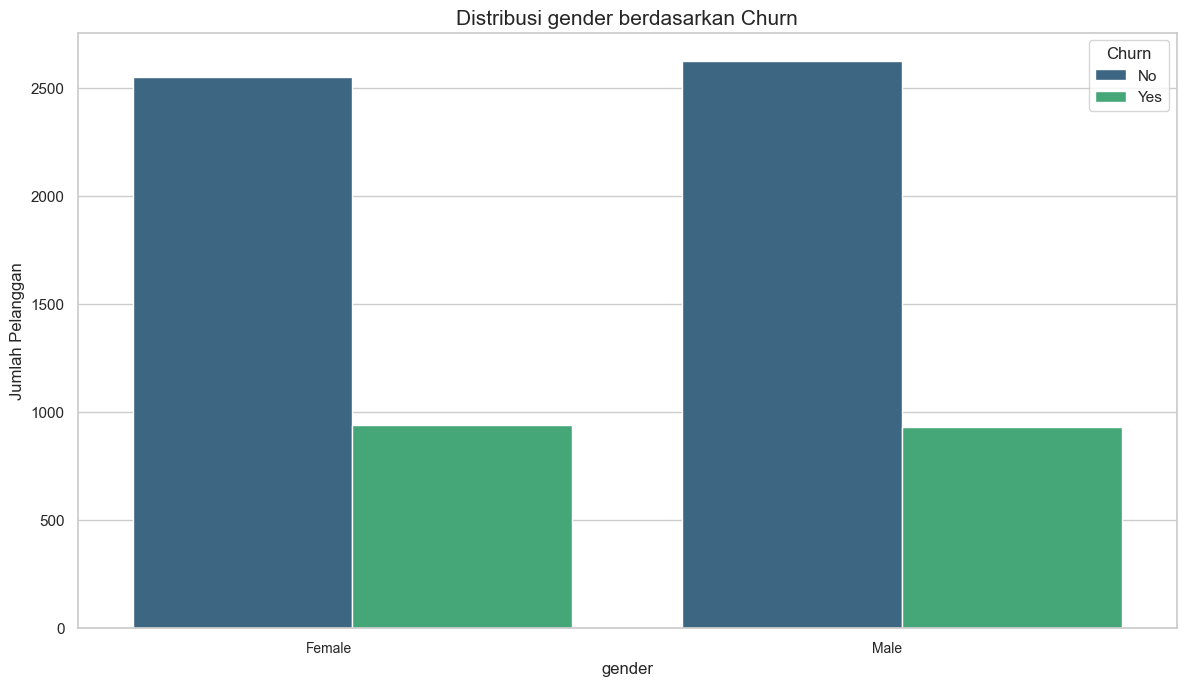

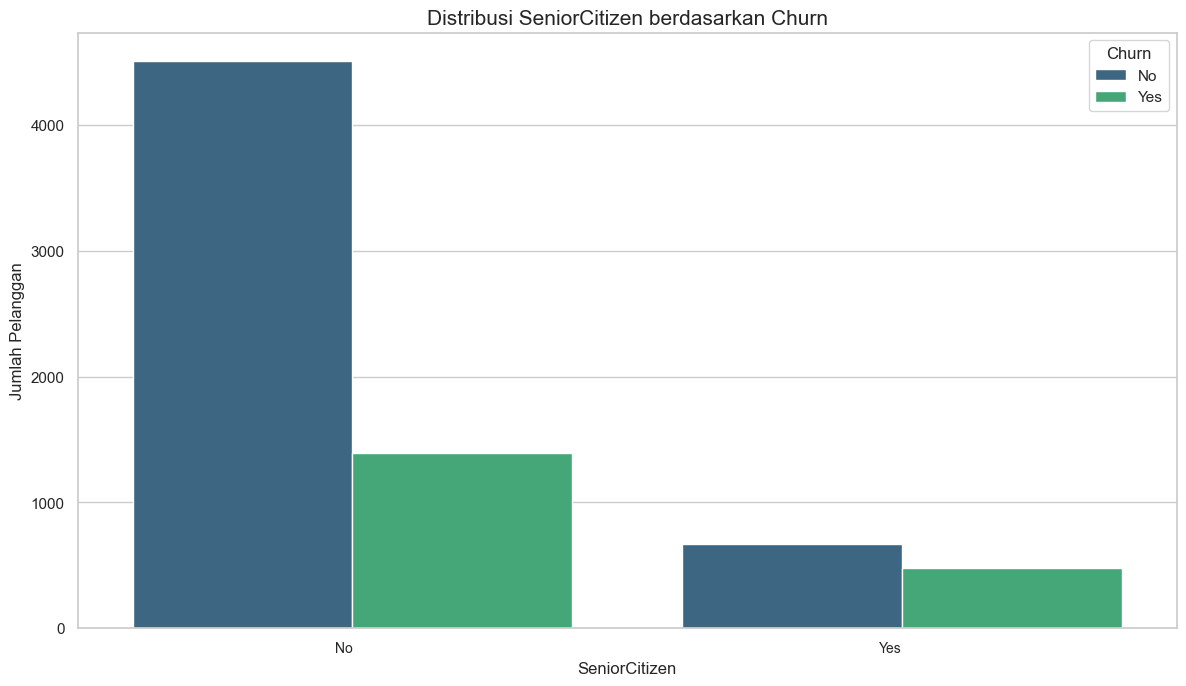

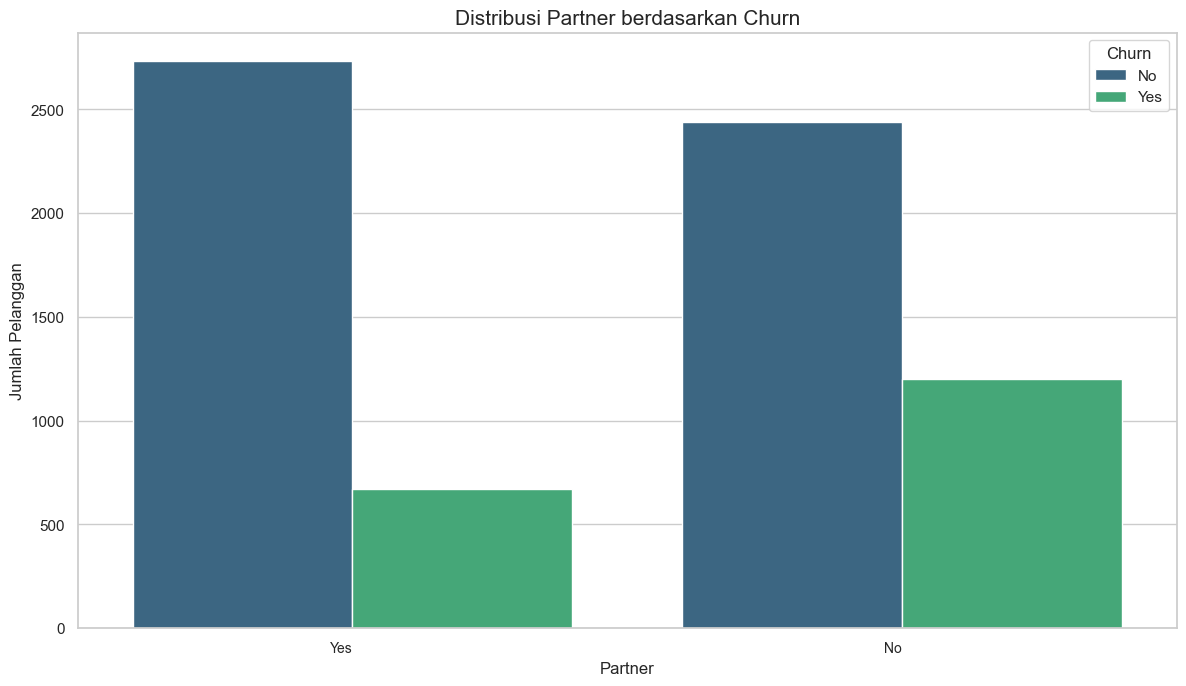

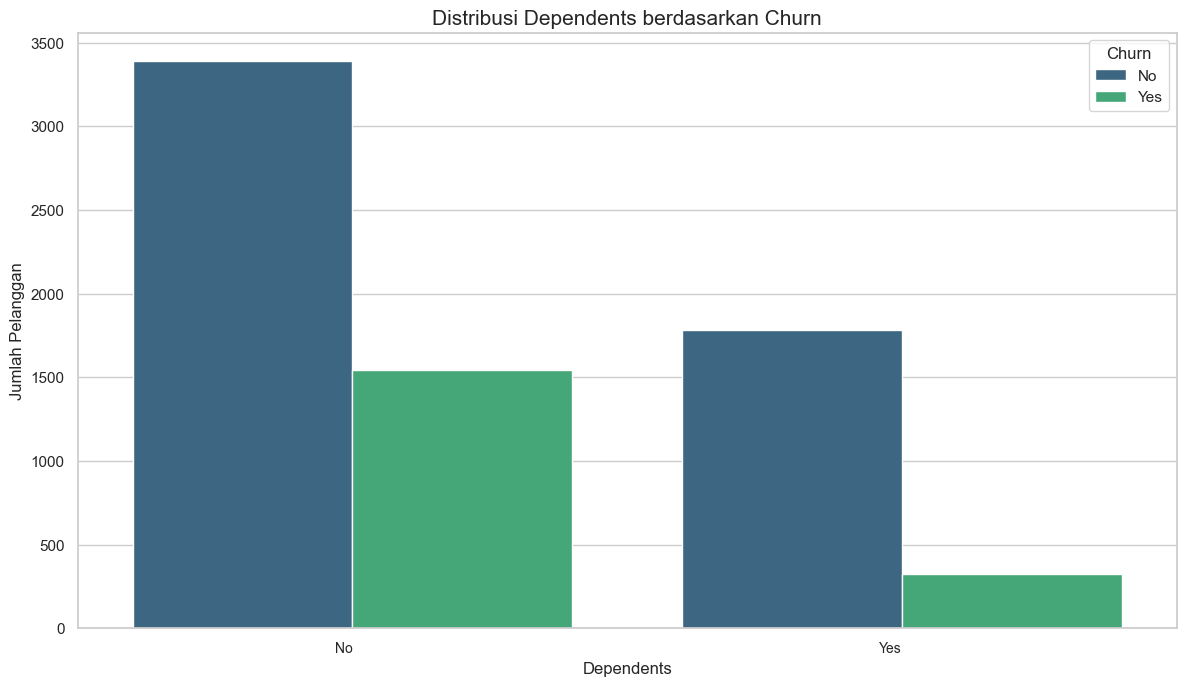

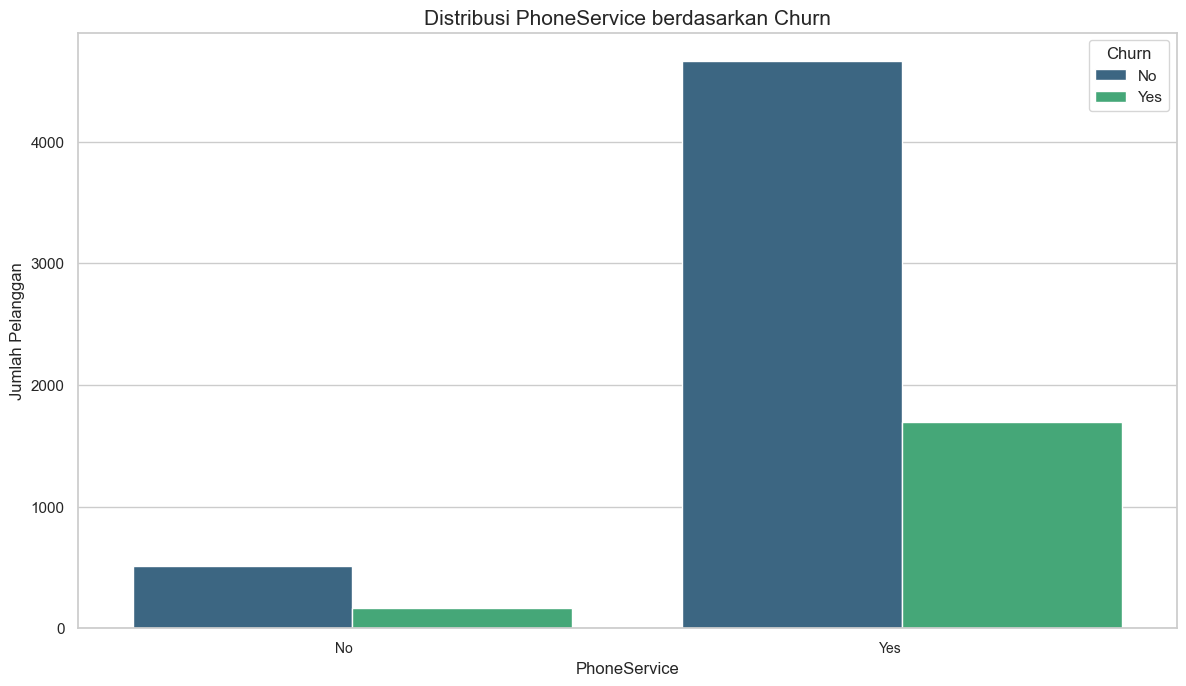

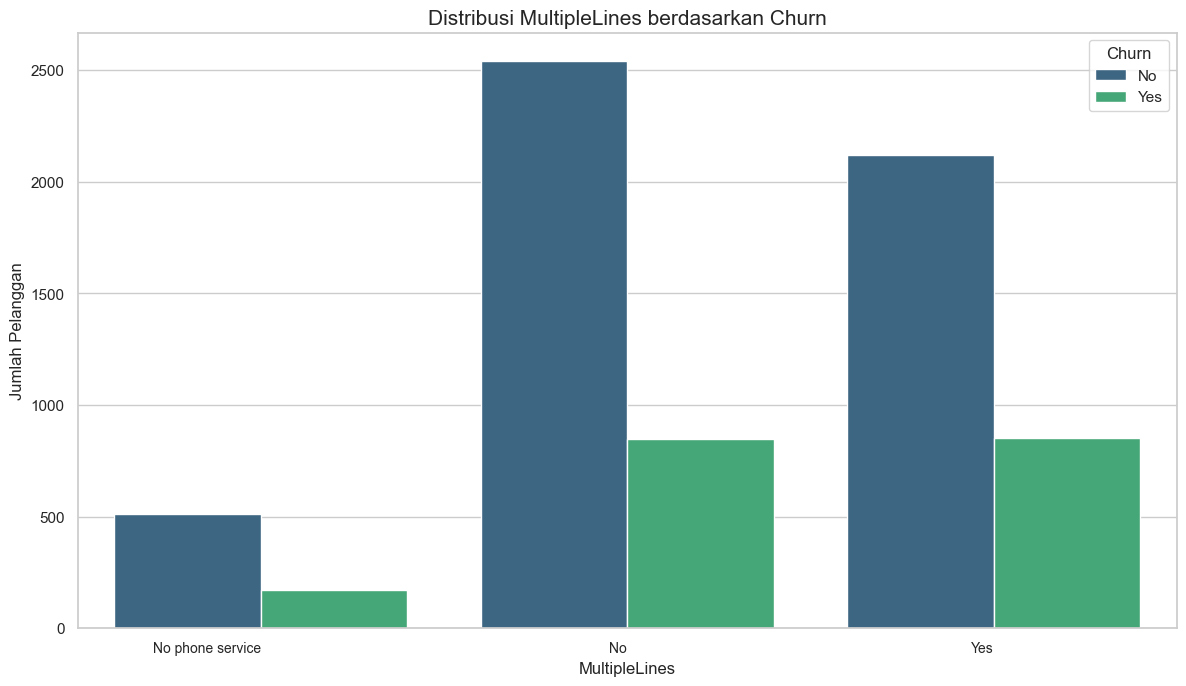

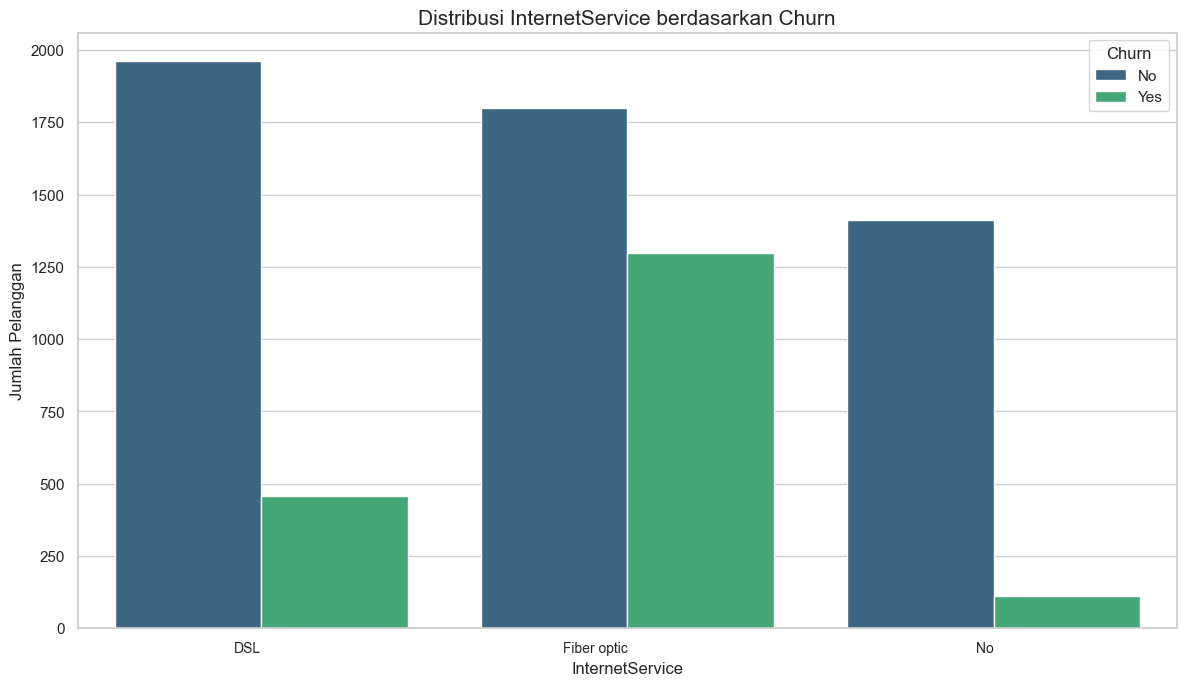

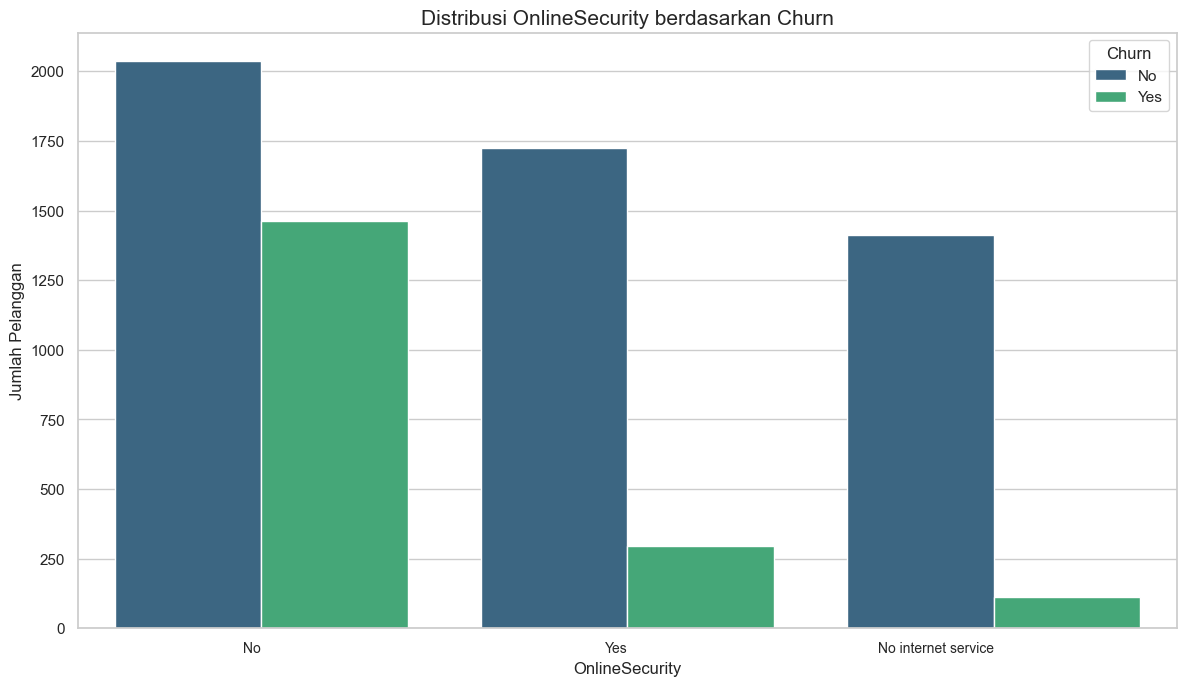

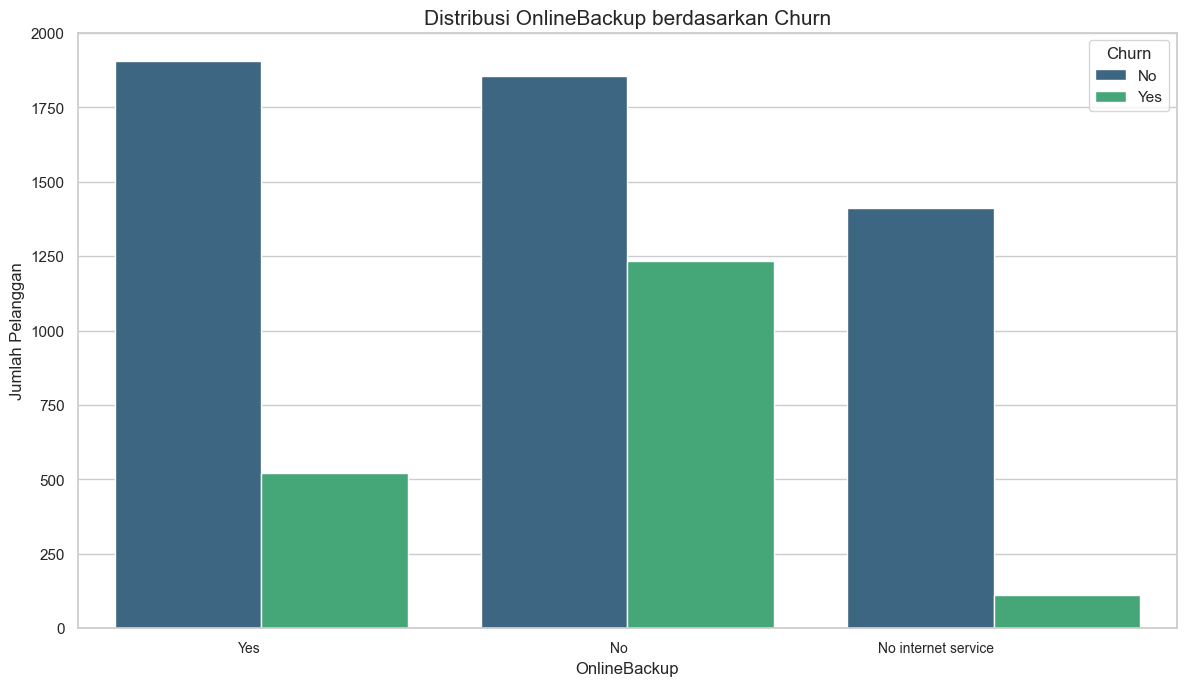

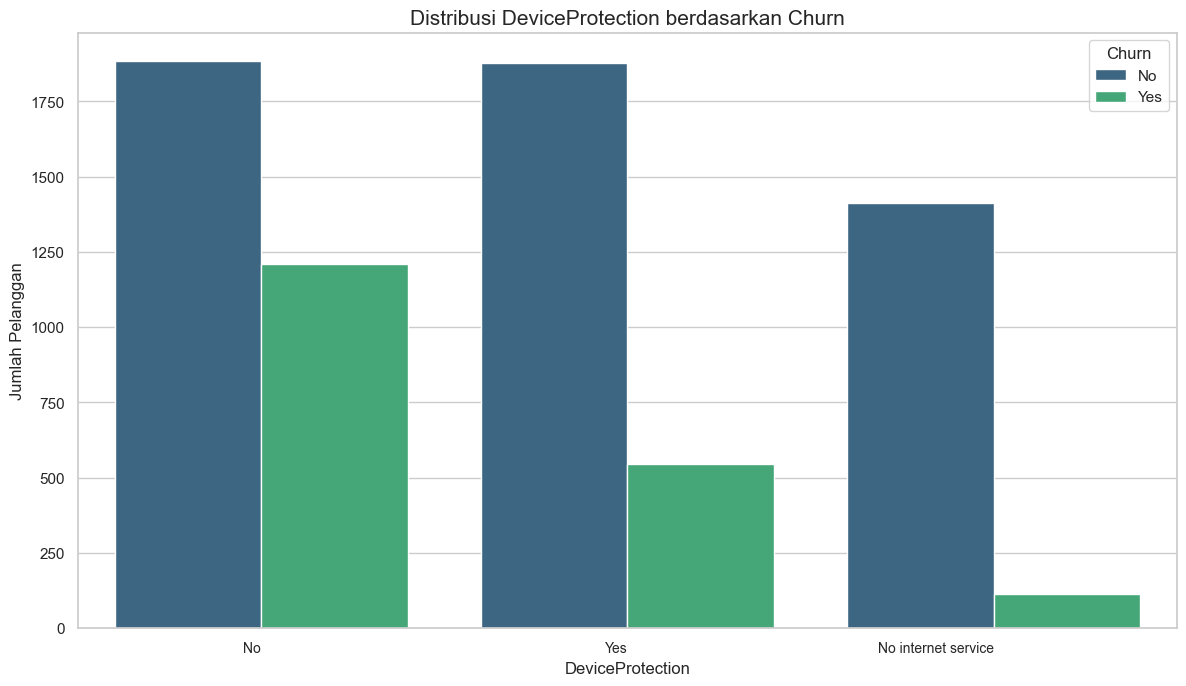

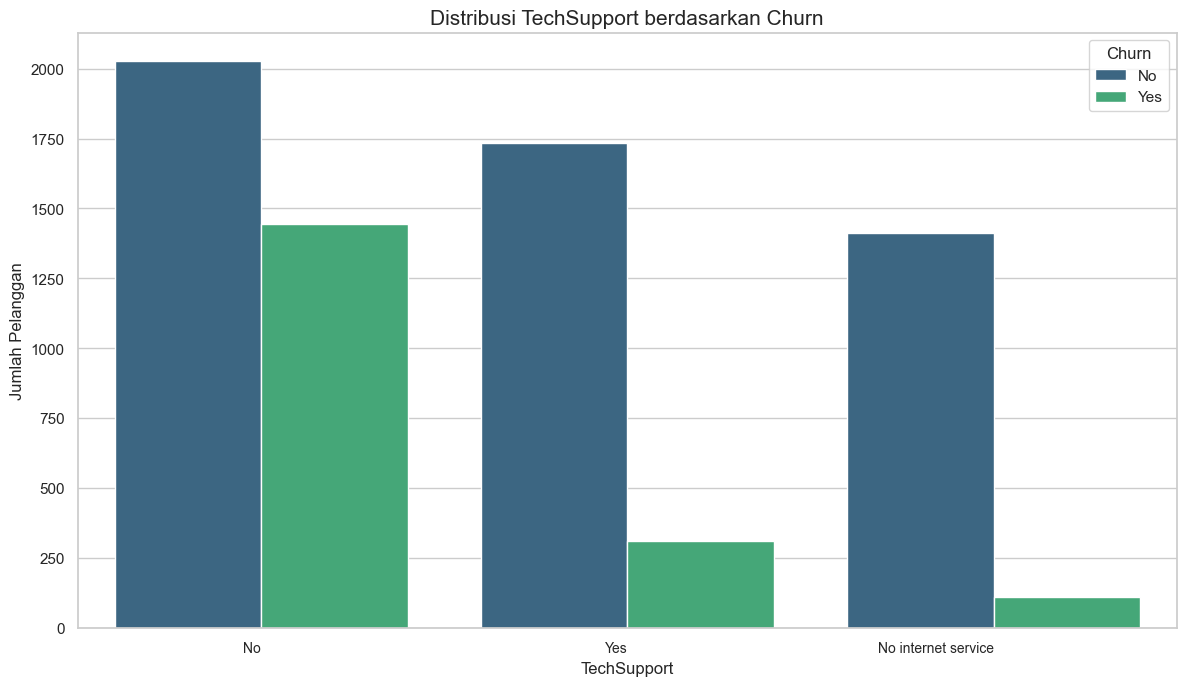

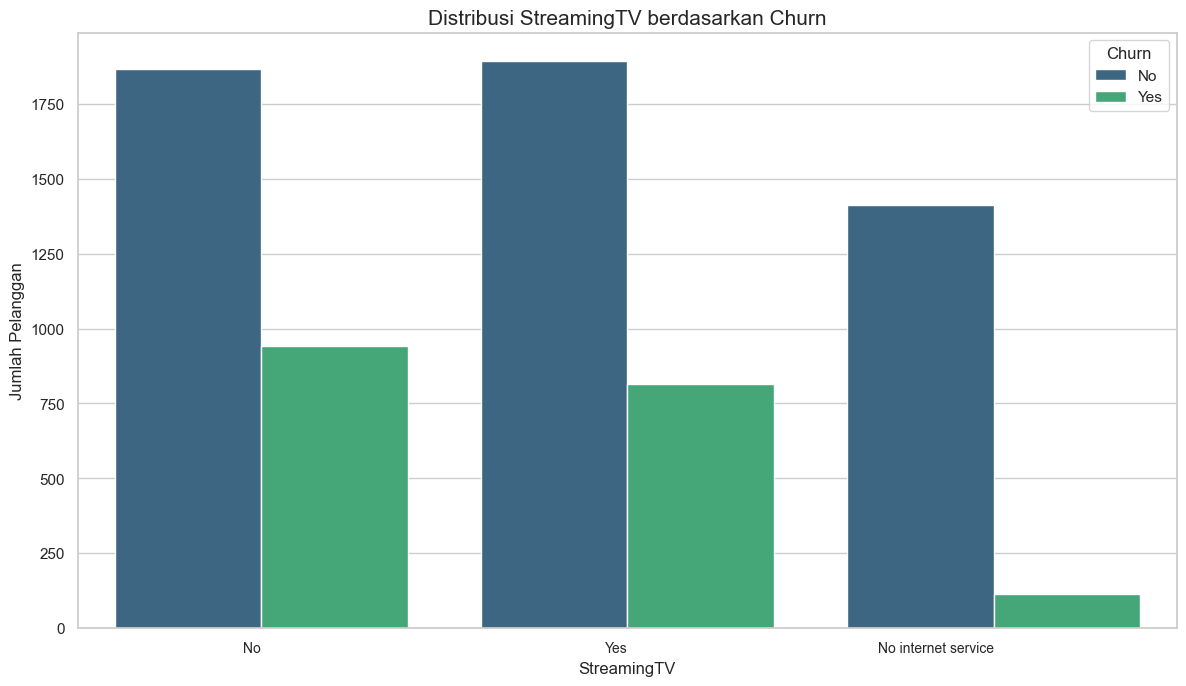

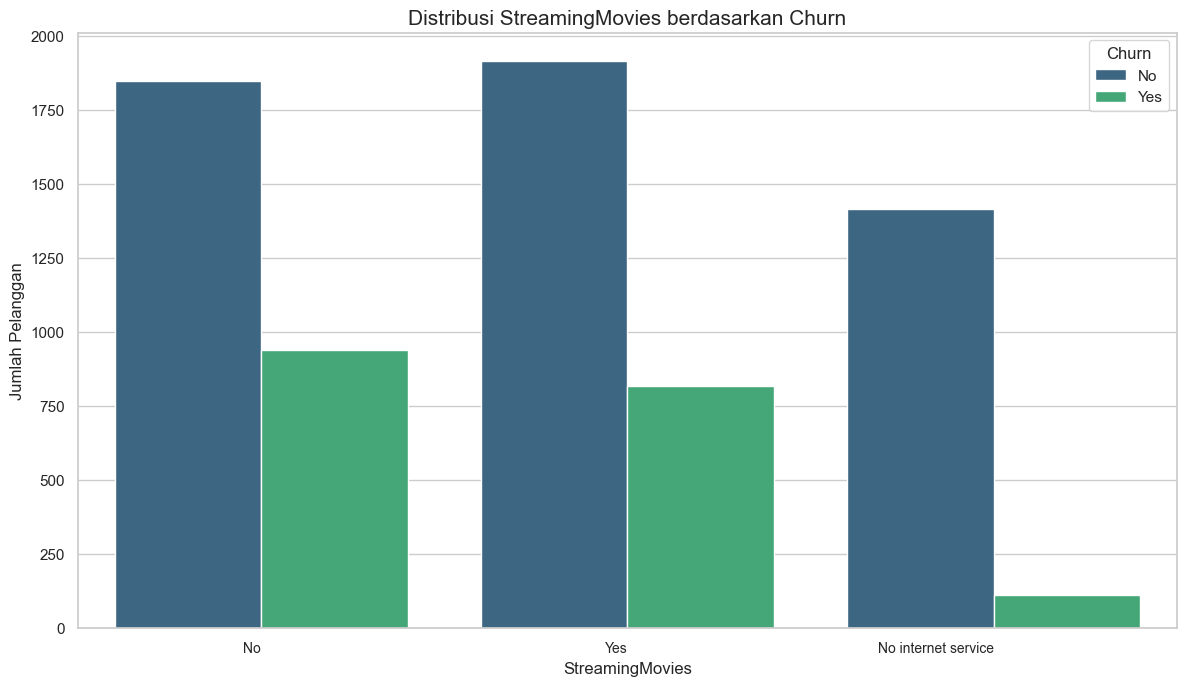

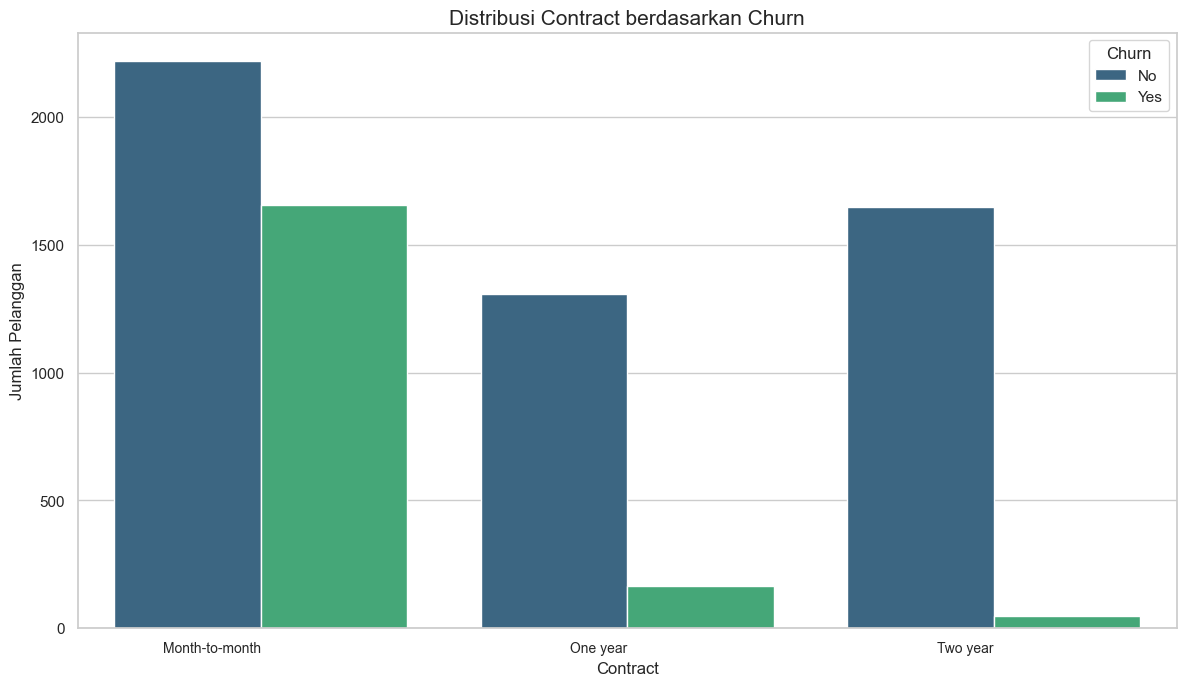

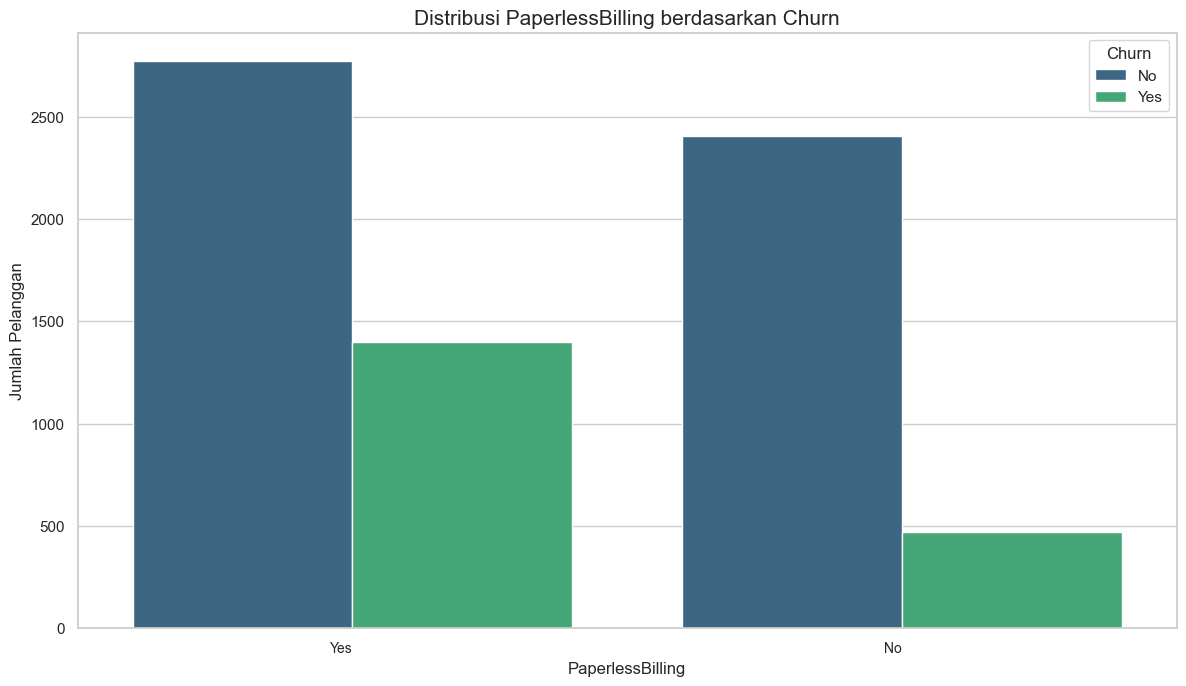

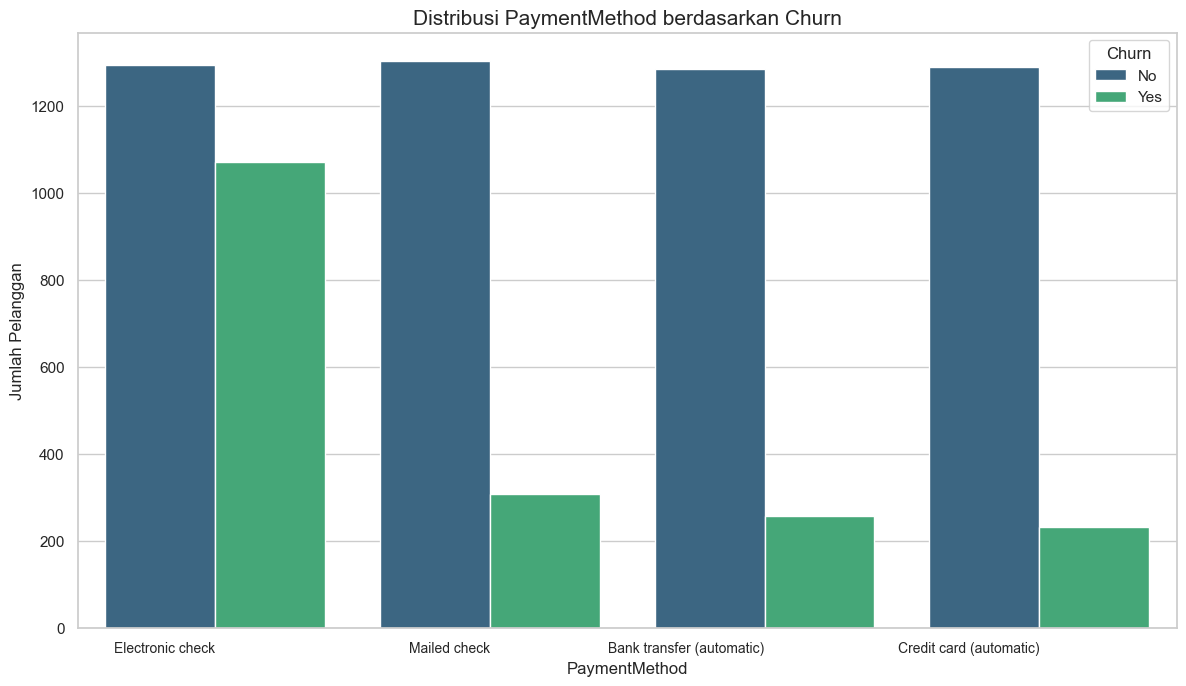

In [23]:
# Distribusi Fitur Kategorikal terhadap Churn
for col_cat in categorical_cols:
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.countplot(x=col_cat, hue=target_col, data=df, palette='viridis', dodge=True, ax=ax)
    ax.set_title(f'Distribusi {col_cat} berdasarkan Churn', fontsize=15)
    ax.set_xlabel(col_cat, fontsize=12)
    ax.set_ylabel('Jumlah Pelanggan', fontsize=12)
    plt.xticks(ha='right', fontsize=10)
    plt.tight_layout(pad=1.0)
    plt.show()

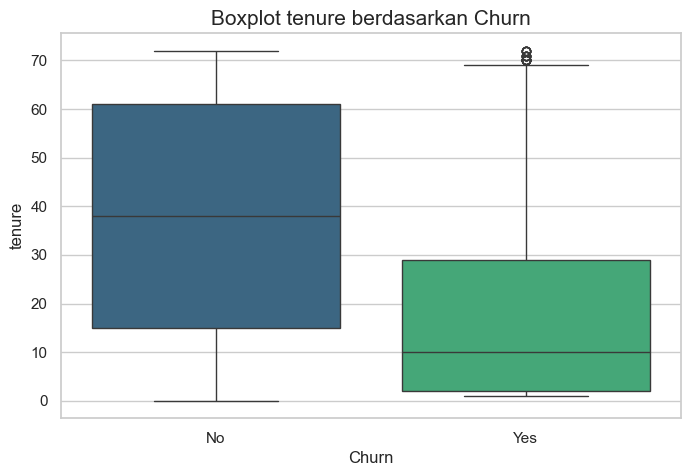

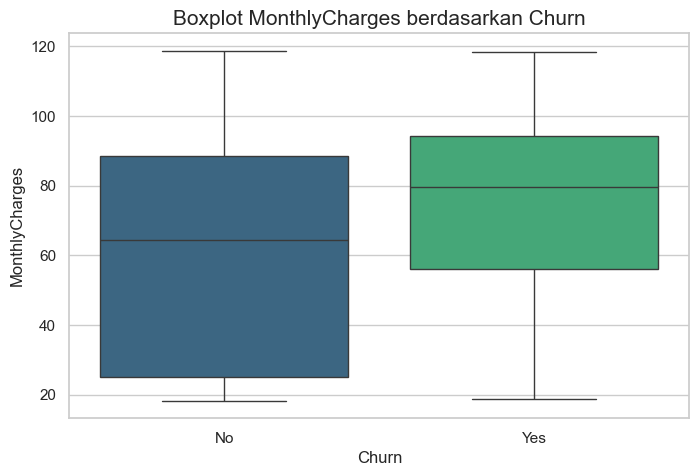

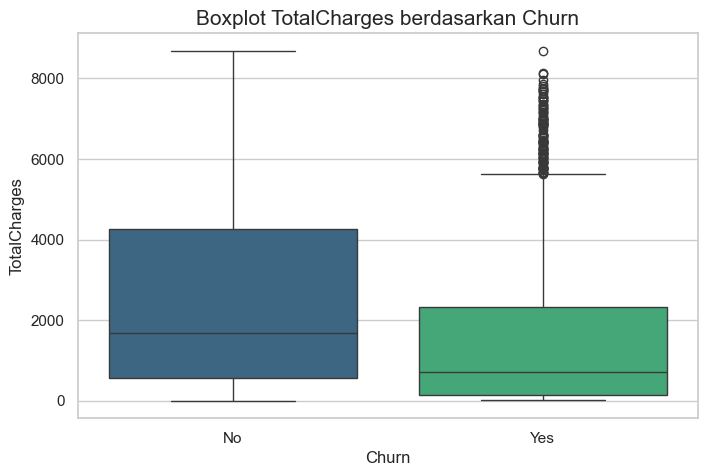

In [24]:
# Boxplot Fitur Numerik
for col_num_box in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target_col, y=col_num_box, data=df, palette='viridis')
    plt.title(f'Boxplot {col_num_box} berdasarkan Churn', fontsize=15)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(col_num_box, fontsize=12)
    plt.show()

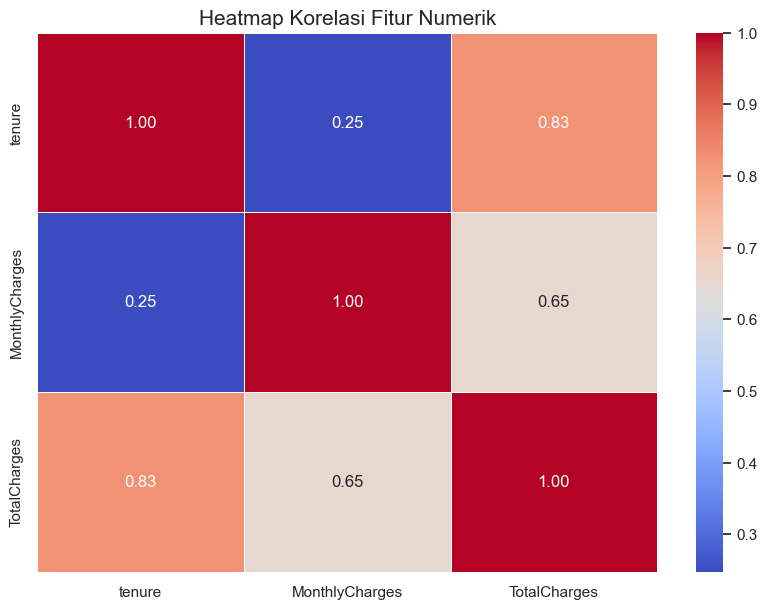

In [25]:
# Heatmap Korelasi Fitur Numerik
if numerical_cols:
    plt.figure(figsize=(10, 7))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Heatmap Korelasi Fitur Numerik', fontsize=15)
    plt.show()
else:
    print("\nNo numerical features for correlation heatmap.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [26]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(target_col, axis=1)
y = df[target_col].apply(lambda x: 1 if x == 'Yes' else 0)

print(f"Shape X (features): {X.shape}, Shape y (target): {y.shape}")
print(f"Target distribution after encoding (0/1): \n{y.value_counts(normalize=True)}")

Shape X (features): (7043, 19), Shape y (target): (7043,)
Target distribution after encoding (0/1): 
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [27]:
# --- Membuat Preprocessor dengan ColumnTransformer ---
numerical_features_X = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_X = X.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_X),
        ('cat', categorical_transformer, categorical_features_X)
    ],
    remainder='passthrough'
)
print("\nPreprocessor (ColumnTransformer) created.")


Preprocessor (ColumnTransformer) created.


In [28]:
# --- Pemisahan Data (Train-Test Split) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Data split into training and testing sets:
X_train shape: (5634, 19), y_train shape: (5634,)
X_test shape: (1409, 19), y_test shape: (1409,)


In [29]:
# --- Terapkan Preprocessor pada Data Training dan Testing ---
X_train_processed_array = preprocessor.fit_transform(X_train)
X_test_processed_array = preprocessor.transform(X_test)

try:
    onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features_X)
    all_feature_names_processed = numerical_features_X + list(onehot_feature_names)
    
    X_train_processed = pd.DataFrame(X_train_processed_array, columns=all_feature_names_processed, index=X_train.index)
    X_test_processed = pd.DataFrame(X_test_processed_array, columns=all_feature_names_processed, index=X_test.index)

    print(f"\nShape X_train_processed (DataFrame): {X_train_processed.shape}")
    print("X_train_processed.head():")
    print(X_train_processed.head())
except Exception as e:
    print(f"\nError creating DataFrame from processed data: {e}")
    X_train_processed = X_train_processed_array
    X_test_processed = X_test_processed_array
    print(f"\nUsing NumPy array for processed data. Shape X_train_processed (array): {X_train_processed.shape}")

print("\n--- Data Preprocessing Complete ---")
print("Data is ready for modeling (X_train_processed, y_train, X_test_processed, y_test).")


Shape X_train_processed (DataFrame): (5634, 30)
X_train_processed.head():
        tenure  MonthlyCharges  TotalCharges  gender_Male  SeniorCitizen_Yes  \
3738  0.102371       -0.521976     -0.262257          1.0                0.0   
3151 -0.711743        0.337478     -0.503635          1.0                0.0   
4860 -0.793155       -0.809013     -0.749883          1.0                0.0   
3867 -0.263980        0.284384     -0.172722          0.0                0.0   
3810 -1.281624       -0.676279     -0.989374          1.0                0.0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
3738          0.0             0.0               0.0   
3151          1.0             1.0               1.0   
4860          1.0             1.0               0.0   
3867          1.0             0.0               1.0   
3810          1.0             1.0               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  \
3738                             1.0                0.